<a href="https://colab.research.google.com/github/Aditi-Zingre/Dark_Pattern_Detector/blob/main/Another_copy_of_Dark_Pattern_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers
!pip install datasets evaluate accelerate optuna optimum
!pip install --upgrade-strategy eager install optimum[onnxruntime]
!pip install onnxruntime-gpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.7/536.7 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.0/280.0 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 407.1/407.1 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [ ]:
from huggingface_hub import notebook_login


notebook_login()

In [ ]:
pip install CuPy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 26.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for CuPy
  Running setup.py clean for CuPy
Failed to build CuPy
ERROR: Could not build wheels for CuPy, which is required to install pyproject.toml-based projects


In [ ]:
pip install cupy-cuda11x

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.3/95.3 MB 8.7 MB/s eta 0:00:00


In [ ]:
pip install optimum.onnxruntime

ERROR: Could not find a version that satisfies the requirement optimum.onnxruntime (from versions: none)
ERROR: No matching distribution found for optimum.onnxruntime


In [ ]:
pip install pydataset

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939416 sha256=789cc93b7986b583d29943f0c829b8a4a4db3938b0873dae22369d227ccb296b
  Stored in directory: /root/.cache/pip/wheels/2b/83/5c/073c3755e8b7704e4677557b2055e61026c1a2342149214c13
Successfully built pydataset


In [ ]:
import os
import time
import shutil
import torch
import pandas as pd
from datasets import load_dataset
from transformers import AutoTokenizer
from transformers import Trainer, TrainingArguments
from datasets import Features, Value, ClassLabel
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from transformers import AutoModelForSequenceClassification, AutoConfig
from optimum.onnxruntime import ORTQuantizer, ORTModelForSequenceClassification
from optimum.onnxruntime.configuration import AutoQuantizationConfig

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
df = pd.read_csv("/content/Datset_dark_patterns.tsv", delimiter="\\t")

<ipython-input-11-febd3cd17e5b>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("/content/Datset_dark_patterns.tsv", delimiter="\\t")


In [ ]:
df.head()

,page_id,text,label,Pattern Category
0,1012,FLASH SALE | LIMITED TIME ONLY Shop Now,1,Urgency
1,158,Pillowcases & Shams,0,Not Dark Pattern
2,108,Write a review,0,Not Dark Pattern
3,1425,"To start your return, simply click on the foll...",0,Not Dark Pattern
4,1658,newsletter signup (privacy policy),0,Not Dark Pattern


In [ ]:
df.columns

Index(['page_id', 'text', 'label', 'Pattern Category'], dtype='object')

In [ ]:
df = df.drop(columns = ['page_id', 'Pattern Category'],axis=1)

In [ ]:
df.head()

,text,label
0,FLASH SALE | LIMITED TIME ONLY Shop Now,1
1,Pillowcases & Shams,0
2,Write a review,0
3,"To start your return, simply click on the foll...",0
4,newsletter signup (privacy policy),0


In [ ]:
df["label"].value_counts()

0               1178
1               1175
Social Proof       1
Urgency            1
Misdirection       1
Name: label, dtype: int64

In [ ]:
df["label"].unique()

array(['1', '0', None, 'Social Proof', 'Urgency', 'Misdirection'],
      dtype=object)

In [ ]:
remove = [ None, 'Social Proof', 'Urgency', 'Misdirection']

In [ ]:
df = df[~df['label'].isin(remove)]

In [ ]:
df["label"] = df["label"].astype(int)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_intent, test_intent = train_test_split(df,test_size=0.1, stratify = df["label"])

In [ ]:
train_intent["label"].value_counts(normalize=True)

0    0.500709
1    0.499291
Name: label, dtype: float64

In [ ]:
test_intent["label"].value_counts(normalize=True)

0    0.5
1    0.5
Name: label, dtype: float64

In [ ]:
train_intent.to_csv("train_help.csv" , index=False)
test_intent.to_csv("val_help.csv",index=False)

In [ ]:
class_names =  ["Not_Dark_Pattern","Dark_Pattern"]

In [ ]:

ft=Features({'text':Value(dtype='string',id=None), 'label': ClassLabel(num_classes=len(class_names), names=class_names)})
dataset=load_dataset('csv',data_files={'train':'train_help.csv','validation':'val_help.csv'},features=ft)

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

In [ ]:
model_ckpt = "distilroberta-base"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [ ]:

def tokenize(batch):
  return tokenizer(batch["text"], padding=True, truncation=True)

helpdesk_encoded = dataset.map(tokenize, batched=True, batch_size=None)
helpdesk_encoded.set_format("torch", columns=["input_ids", "attention_mask", "label"])

Map:   0%|          | 0/2117 [00:00<?, ? examples/s]

Map:   0%|          | 0/236 [00:00<?, ? examples/s]

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
num_labels = len(class_names)
model = (AutoModelForSequenceClassification
      .from_pretrained(model_ckpt, num_labels=num_labels)
      .to(device))

model.safetensors:   0%|          | 0.00/331M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at distilroberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
config = (AutoConfig.from_pretrained(model_ckpt,
                                  num_labels=len(class_names),
                                  id2label={i: label for i, label in enumerate(class_names)},
                                  label2id={label: i for i, label in enumerate(class_names)}))

model.config = config

In [ ]:

def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  f1 = f1_score(labels, preds, average="weighted")
  acc = accuracy_score(labels, preds)
  return {"accuracy": acc, "f1": f1}


In [ ]:
batch_size = 4
logging_steps = len(helpdesk_encoded["train"]) // batch_size
model_name = "aditi/distilroberta-dark-pattern"
training_args = TrainingArguments(
  output_dir=model_name,
  num_train_epochs=2,
  learning_rate=2e-5,
  evaluation_strategy ='steps',
  eval_steps=500,
  per_device_eval_batch_size=batch_size,
  weight_decay=0.01,
  save_steps=2000,
  save_total_limit=3,
  load_best_model_at_end= True,
  logging_steps=logging_steps,
  gradient_checkpointing=True,
  push_to_hub=True)

In [ ]:
trainer = Trainer(model=model,
                args=training_args,
                compute_metrics=compute_metrics,
                train_dataset=helpdesk_encoded["train"],
                eval_dataset=helpdesk_encoded["validation"],
                tokenizer=tokenizer)

trainer.train()

/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(


Step,Training Loss,Validation Loss


In [ ]:
trainer.push_to_hub("Training complete!")

model.safetensors:   0%|          | 0.00/328M [00:00<?, ?B/s]

Upload 3 LFS files:   0%|          | 0/3 [00:00<?, ?it/s]

training_args.bin:   0%|          | 0.00/4.73k [00:00<?, ?B/s]

events.out.tfevents.1709013148.5f5fb490ab31.219.0:   0%|          | 0.00/5.42k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/IraJoshi01/distilroberta-dark-pattern/commit/0574e975a41d44abc86a93db1be45c584fea5d7d', commit_message='Training complete!', commit_description='', oid='0574e975a41d44abc86a93db1be45c584fea5d7d', pr_url=None, pr_revision=None, pr_num=None)

In [ ]:
trainer.save_model("fine_tuned_model")

In [ ]:
from huggingface_hub import HfApi
api = HfApi()

In [ ]:


onnx_model = ORTModelForSequenceClassification.from_pretrained("fine_tuned_model", export=True)
quantizer = ORTQuantizer.from_pretrained(onnx_model)
dqconfig = AutoQuantizationConfig.avx512_vnni(is_static=False, per_channel=False)
model_quantized_path = quantizer.quantize(
  save_dir="model",
  quantization_config=dqconfig,
)
time.sleep(15)


Framework not specified. Using pt to export the model.
Using the export variant default. Available variants are:
    - default: The default ONNX variant.
Using framework PyTorch: 2.1.0+cu121
Overriding 1 configuration item(s)
	- use_cache -> False
Creating dynamic quantizer: QOperator (mode: IntegerOps, schema: u8/s8, channel-wise: False)
Quantizing model...
Saving quantized model at: model (external data format: False)
Configuration saved in model/ort_config.json


In [ ]:
api.upload_folder(
  folder_path="model",
  repo_id="IraJoshi01/distilroberta-dark-pattern",
  repo_type="model"
)

model_quantized.onnx:   0%|          | 0.00/82.6M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/IraJoshi01/distilroberta-dark-pattern/commit/9883040433a7a5e122401e81d6b79bbc3c43cd2b', commit_message='Upload folder using huggingface_hub', commit_description='', oid='9883040433a7a5e122401e81d6b79bbc3c43cd2b', pr_url=None, pr_revision=None, pr_num=None)

In [ ]:
quant_sent_model = ORTModelForSequenceClassification.from_pretrained("Venkatesh4342/quantized-dark_pattern")
quant_sent_tokenizer = AutoTokenizer.from_pretrained("Venkatesh4342/quantized-dark_pattern")

config.json:   0%|          | 0.00/882 [00:00<?, ?B/s]

model_quantized.onnx:   0%|          | 0.00/82.6M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.41k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/958 [00:00<?, ?B/s]

In [ ]:
from transformers import pipeline

In [ ]:
pipe =  pipeline("text-classification", model=quant_sent_model, tokenizer=quant_sent_tokenizer)

In [ ]:
result = pipe("win exciting prize of $10000000")

In [ ]:
result

[{'label': 'Dark_Pattern', 'score': 0.9999727010726929}]

In [ ]:
from typing import List, Optional, Union

In [ ]:
import transformers

In [ ]:
class dark_pattern_recognition:
  def __init__(
        self,
        intent_pipe,
    ):
        self.intent_pipeline = intent_pipe

  @classmethod
  def load_model(
        cls,
        dark_pattern_model: Optional[str] = "IraJoshi01/distilroberta-dark-pattern",
     ):

        quant_intent_model = ORTModelForSequenceClassification.from_pretrained(dark_pattern_model)
        quant_intent_tokenizer = AutoTokenizer.from_pretrained(dark_pattern_model)
        intent_pipe =  transformers.pipeline("text-classification", model=quant_intent_model, tokenizer=quant_intent_tokenizer )

        return cls(intent_pipe)

  def __call__(
        self,
        input: Optional[str],
    ):
      intent = self.intent_pipeline(input)

      return intent[0]["label"]

In [ ]:
pipe = dark_pattern_recognition.load_model()

config.json:   0%|          | 0.00/882 [00:00<?, ?B/s]

model_quantized.onnx:   0%|          | 0.00/82.6M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.41k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/958 [00:00<?, ?B/s]

In [ ]:
res = pipe("Refund is available here")

In [ ]:
res

'Not_Dark_Pattern'

In [ ]:
!pip install gtts

In [ ]:
'''from gtts import gTTS
from IPython.display import Audio

def text_to_speech(text):
    tts = gTTS(text=text, lang='en')
    tts.save("output.mp3")
    return Audio("output.mp3", autoplay=True)

# Example usage
#text = "Hello, how are you?"
text_to_speech(res)'''


'from gtts import gTTS\nfrom IPython.display import Audio\n\ndef text_to_speech(text):\n    tts = gTTS(text=text, lang=\'en\')\n    tts.save("output.mp3")\n    return Audio("output.mp3", autoplay=True)\n\n# Example usage\n#text = "Hello, how are you?"\ntext_to_speech(res)'

In [ ]:
!pip install anvil-uplink

In [ ]:
import anvil.server

anvil.server.connect("server_OU5ZLOBMMAUDV5FB5DGIZW6H-W6LOYY6OAZSPQWSG")

In [ ]:
@anvil.server.callable
def predict_dark_pattern(statement0):
  out0 = pipe(statement0)
  return out0

In [ ]:
pip install flask_cors

In [ ]:
from flask import Flask, request, jsonify
from flask_cors import CORS
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt
import nltk

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from xgboost import XGBClassifier
import requests

In [ ]:
# Function to scrape text from a website
def scrape_text_from_website(url):
    # Use the requests library to fetch the HTML content of the webpage
    import requests
    from bs4 import BeautifulSoup

    response = requests.get(url)

    if response.status_code == 200:
        # Parse the HTML content using BeautifulSoup
        soup = BeautifulSoup(response.text, 'html.parser')


        # Extract text from the webpage
        text = ' '.join([p.get_text() for p in soup.find_all('p')])
        return text
    else:
        print(f"Failed to fetch content from {url}")
        return None

In [ ]:
df = pd.read_csv('/content/Datset_dark_patterns.csv')
df

,page_id,text,label,Pattern Category
0,1012,FLASH SALE | LIMITED TIME ONLY Shop Now,1,Urgency
1,158,Pillowcases & Shams,0,Not Dark Pattern
2,108,Write a review,0,Not Dark Pattern
3,1425,"To start your return, simply click on the foll...",0,Not Dark Pattern
4,1658,newsletter signup (privacy policy),0,Not Dark Pattern
...,...,...,...,...
2351,1304,Bra Panty Set,0,Not Dark Pattern
2352,1038,DressesFootwearHatsHoodies & SweatshirtsJersey...,0,Not Dark Pattern
2353,1081,Only 4 left in stock,1,Scarcity
2354,767,Trending Players,0,Not Dark Pattern


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
df.info()

In [ ]:
df['label'].value_counts()

1    1178
0    1178
Name: label, dtype: int64

In [ ]:
df.describe()

,page_id,label
count,2356.000000,2356.000000
mean,904.327674,0.500000
std,539.815985,0.500106
min,1.000000,0.000000
25%,380.750000,0.000000
50%,965.500000,0.500000
75%,1385.250000,1.000000
max,1818.000000,1.000000


In [ ]:
df.groupby('label').describe().T

label                    0            1
page_id count  1178.000000  1178.000000
        mean    971.150255   837.505093
        std     514.704469   556.049803
        min       4.000000     1.000000
        25%     622.000000   297.250000
        50%    1009.000000   897.500000
        75%    1451.000000  1320.000000
        max    1815.000000  1818.000000

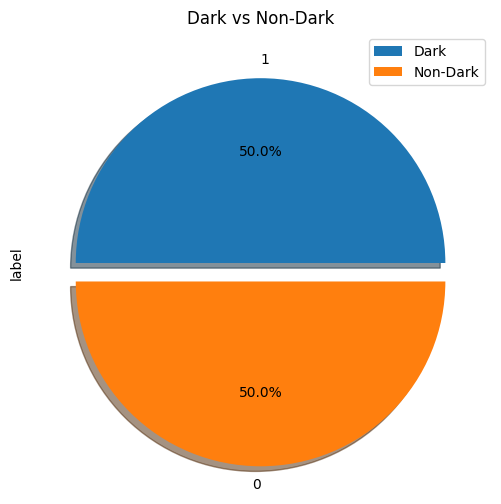

In [ ]:
df["label"].value_counts().plot(kind = 'pie',explode=[0, 0.1],figsize=(6, 6),autopct='%1.1f%%',shadow=True)
plt.title("Dark vs Non-Dark")
plt.legend(["Dark", "Non-Dark"])
plt.show()

In [ ]:
def text_preprocess(txt):
    nopunc = [char for char in txt if char not in string.punctuation]

    nopunc = ''.join(nopunc)
    nopunc = nopunc.lower()

    nostop=[word for word in nopunc.split() if word.lower() not in stopwords.words('english') and word.isalpha()]

    return nostop

In [ ]:
dark = df[df["label"] == 1]["text"]
ndark = df[df["label"] == 0]["text"]
print("dark : ",len(dark))
print("non dark : ",len(ndark))

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
dark_words = text_preprocess(dark)

In [ ]:
dark_words[0:15]

['flash',
 'sale',
 'limited',
 'time',
 'shop',
 'nowin',
 'left',
 'stockin',
 'stock',
 'leftonly',
 'leftour',
 'best',
 'selling',
 'people',
 'added']

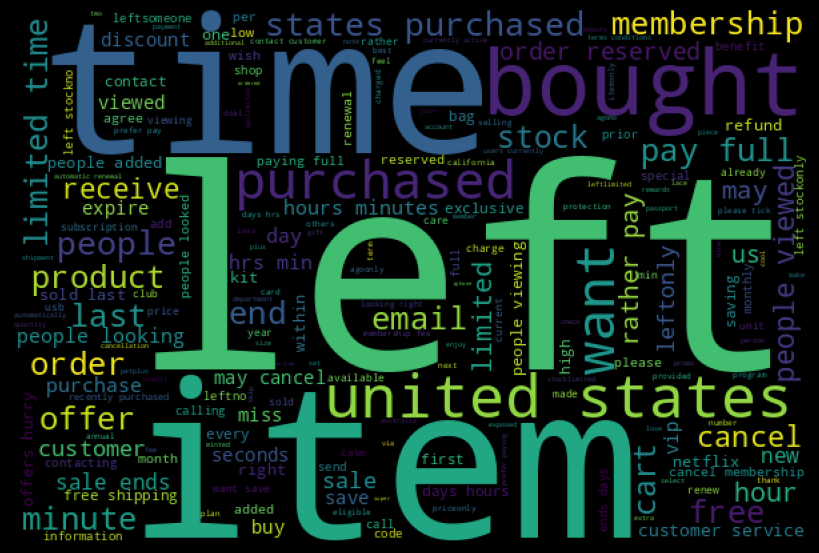

In [ ]:
dark_wordcloud = WordCloud(width=600, height=400).generate(' '.join(dark_words))
plt.figure( figsize=(8,6), facecolor='k')
plt.imshow(dark_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
print("Top 10 dark words:\n")
print(pd.Series(dark_words).value_counts().head(10))

In [ ]:
ndark_words = text_preprocess(ndark)

In [ ]:
ndark_words[:15]

['pillowcases',
 'shamswrite',
 'reviewto',
 'start',
 'simply',
 'click',
 'following',
 'button',
 'add',
 'return',
 'form',
 'receive',
 'email',
 'shipping',
 'instructions']

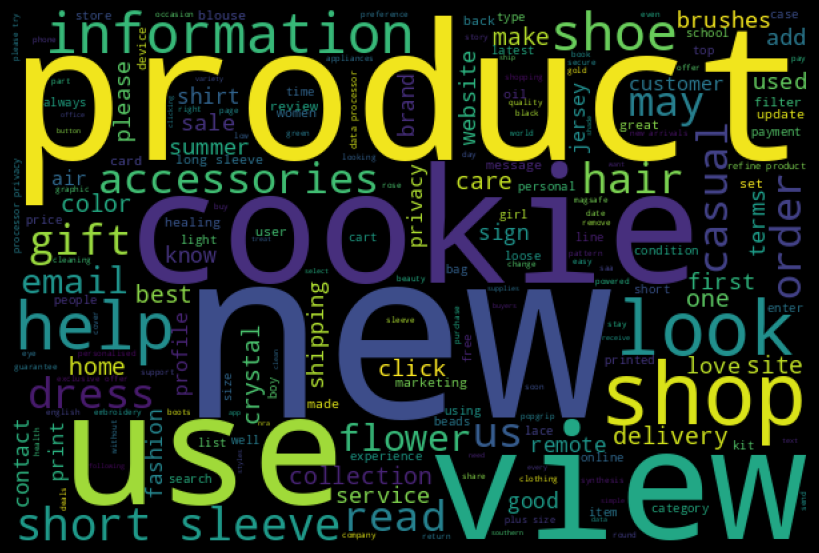

In [ ]:
ndark_wordcloud = WordCloud(width=600, height=400).generate(' '.join(ndark_words))
plt.figure( figsize=(8,6), facecolor='k')
plt.imshow(ndark_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
print("Top 10 Non dark words are :\n")
print(pd.Series(ndark_words).value_counts().head(10))

In [ ]:
df["text"] = df["text"].apply(text_preprocess)

In [ ]:
import gensim

In [ ]:
from gensim import models

In [ ]:
vector_size_n_w2v = 5

w2v_model = gensim.models.Word2Vec(vector_size=vector_size_n_w2v,
                     window=3,
                     min_count=1,
                     sg=0) # 0=CBOW, 1=Skip-gram

print(w2v_model)

In [ ]:
w2v_model.build_vocab(df['text'])
print(w2v_model)

In [ ]:
w2v_model.train(df['text'],
                total_examples=w2v_model.corpus_count,
                epochs=5)

(46969, 53625)

In [ ]:
len(w2v_model.wv.index_to_key)

3442

In [ ]:
words = set(w2v_model.wv.index_to_key)

def get_word_vectors(words_list, model, max_length):
    vectors = [model.wv[i] for i in words_list if i in words]
    while len(vectors) < max_length:
        vectors.append(np.zeros(model.vector_size))
    return np.array(vectors)

MAX_LENGTH = 5000

df['w2v'] = df['text'].apply(lambda x: get_word_vectors(x, w2v_model, MAX_LENGTH))

df['w2v'] = df['w2v'].apply(lambda x: x.flatten())

In [ ]:
df

,page_id,text,label,Pattern Category,w2v
0,1012,"[flash, sale, limited, time, shop]",1,Urgency,"[0.05767805874347687, 0.0985756516456604, -0.0..."
1,158,"[pillowcases, shams]",0,Not Dark Pattern,"[0.11727563291788101, -0.13886697590351105, -0..."
2,108,"[write, review]",0,Not Dark Pattern,"[0.12731100618839264, -0.06607036292552948, -0..."
3,1425,"[start, return, simply, click, following, butt...",0,Not Dark Pattern,"[0.17988409101963043, 0.048636581748723984, 0...."
4,1658,"[newsletter, signup, privacy, policy]",0,Not Dark Pattern,"[0.10753931105136871, -0.18363268673419952, 0...."
...,...,...,...,...,...
2351,1304,"[bra, panty, set]",0,Not Dark Pattern,"[-0.1598627269268036, 0.0659182146191597, 0.09..."
2352,1038,"[dressesfootwearhatshoodies, sweatshirtsjersey...",0,Not Dark Pattern,"[0.10760969668626785, -0.19766440987586975, -0..."
2353,1081,"[left, stock]",1,Scarcity,"[-0.007654884830117226, 0.017111588269472122, ..."
2354,767,"[trending, players]",0,Not Dark Pattern,"[-0.0310402512550354, -0.16726160049438477, 0...."


In [ ]:
df1 = pd.DataFrame(df['w2v'].tolist(), columns=[f'w2v_{i+1}' for i in range(len(df['w2v'].iloc[0]))])
df1

,w2v_1,w2v_2,w2v_3,w2v_4,w2v_5,w2v_6,w2v_7,w2v_8,w2v_9,w2v_10,...,w2v_24991,w2v_24992,w2v_24993,w2v_24994,w2v_24995,w2v_24996,w2v_24997,w2v_24998,w2v_24999,w2v_25000
0,0.057678,0.098576,-0.020523,-0.065071,0.156953,0.188403,0.138389,0.009620,-0.012654,0.055387,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.117276,-0.138867,-0.025084,-0.054652,-0.028152,-0.105278,-0.134788,-0.195814,0.077266,-0.189186,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.127311,-0.066070,-0.151455,0.003300,0.001545,-0.085944,-0.117896,0.074876,-0.099155,0.174388,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.179884,0.048637,0.078056,-0.201073,-0.190330,0.130026,-0.047984,-0.117579,-0.036114,-0.028491,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.107539,-0.183633,0.176004,0.056445,-0.001922,0.202340,-0.076034,0.164394,0.117574,0.166778,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,-0.159863,0.065918,0.094906,0.135494,0.158322,-0.185797,-0.178808,0.159339,-0.100482,-0.015536,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2352,0.107610,-0.197664,-0.024993,0.035033,0.092250,-0.162256,-0.001996,0.121551,0.072416,-0.141814,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2353,-0.007655,0.017112,0.125053,0.169391,-0.208673,-0.155032,0.131900,0.196942,-0.101692,-0.089963,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2354,-0.031040,-0.167262,0.013358,0.035289,-0.044554,-0.104648,0.105117,-0.031124,0.193465,0.144559,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def preprocess_sentence(sentence):
    tokens = word_tokenize(sentence)

    tokens = [word for word in tokens if word.isalnum()]

    tokens = [word.lower() for word in tokens]

    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return tokens

def get_word_vectors(words_list, model, max_length):
    vectors = [model.wv[i] for i in words_list if i in model.wv]
    while len(vectors) < max_length:
        vectors.append(np.zeros(model.vector_size))
    return np.array(vectors)

def predict_class_for_sentence(sentence, w2v_model, svm_model, max_length):
    processed_sentence = preprocess_sentence(sentence)

    sentence_w2v = get_word_vectors(processed_sentence, w2v_model, max_length)
    sentence_w2v = sentence_w2v.flatten().reshape(1, -1)

    prediction = svm_model.predict(sentence_w2v)

    return prediction[0]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X = df1
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb}")

In [ ]:
# Save Word2Vec model
w2v_model.save('word2vec_model.bin')

# Save XGBoost model
xgb_model.save_model('xgboost_model.model')

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:59:14] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


In [ ]:
import requests
from bs4 import BeautifulSoup

def scrape_cleaned_text_from_website(url):
    try:
        # Send an HTTP request to the URL
        response = requests.get(url)

        # Check if the request was successful (status code 200)
        if response.status_code == 200:
            # Parse the HTML content of the webpage using BeautifulSoup
            soup = BeautifulSoup(response.text, 'html.parser')

            # Extract text from all paragraphs (<p> tags)
            paragraphs = soup.find_all('p')

            # Concatenate the text from all paragraphs into a single paragraph
            entire_text = ' '.join([p.get_text() for p in paragraphs])

            # Remove unwanted characters (e.g., \n)
            cleaned_text = ' '.join(entire_text.split())

            return cleaned_text
        else:
            print(f"Failed to fetch content from {url}. Status code: {response.status_code}")
            return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

def save_text_to_file(text, filename='scraped_data.txt'):
    try:
        with open(filename, 'w', encoding='utf-8') as file:
            file.write(text)
        print(f"Scraped data saved to {filename}")
    except Exception as e:
        print(f"An error occurred while saving to file: {e}")

# Example usage:
website_url = 'https://www.desidime.com/discussions/when-flipkart-shows-you-hurry-only-1-left-is-it-true'
cleaned_text_paragraph = scrape_cleaned_text_from_website(website_url)

if cleaned_text_paragraph:
    print(f"Cleaned text content (paragraph form) scraped from {website_url}:\n")
    print(cleaned_text_paragraph)

    # Save to a text file (overwriting the previous content)
    save_text_to_file(cleaned_text_paragraph)


In [ ]:
cleaned_text_paragraph

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import requests
from bs4 import BeautifulSoup
import nltk  # Import NLTK
from nltk.tokenize import word_tokenize  # Import word_tokenize

# Download NLTK data files
nltk.download('punkt')

website_url = 'https://www.desidime.com/deals/ibell-castor-ctek18m-electric-kettle-1500-watts-1-8-liter-silver-stainless-steel'
cleaned_text_paragraph = scrape_cleaned_text_from_website(website_url)

print("hello1")
if cleaned_text_paragraph:
    print("hello2")
    print(f"Cleaned text content (paragraph form) scraped from {website_url}:\n")
    print(cleaned_text_paragraph)

    input_sentence = cleaned_text_paragraph
    # Assuming preprocess_sentence, get_word_vectors, and predict_class_for_sentence are defined
    processed_sentence = preprocess_sentence(input_sentence)
    sentence_w2v = get_word_vectors(processed_sentence, w2v_model, MAX_LENGTH)
    sentence_w2v = sentence_w2v.flatten().reshape(1, -1)

    predicted_class = predict_class_for_sentence(input_sentence, w2v_model, xgb_model, MAX_LENGTH)
    print(f"Predicted class for the input sentence: {predicted_class}")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


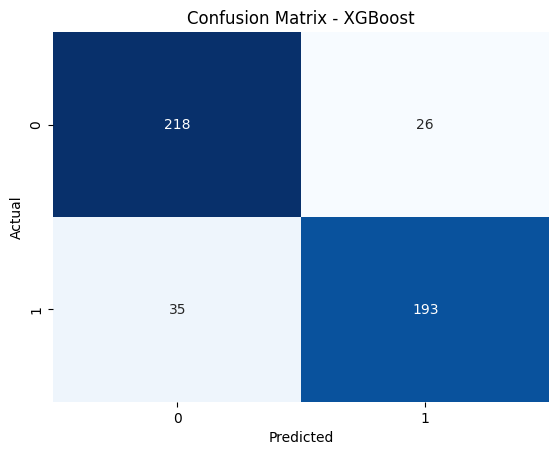

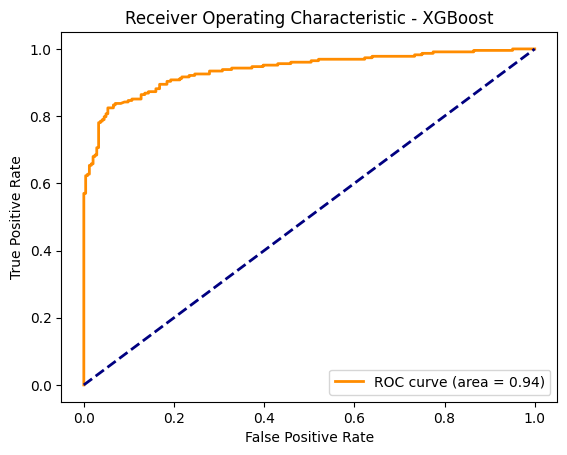

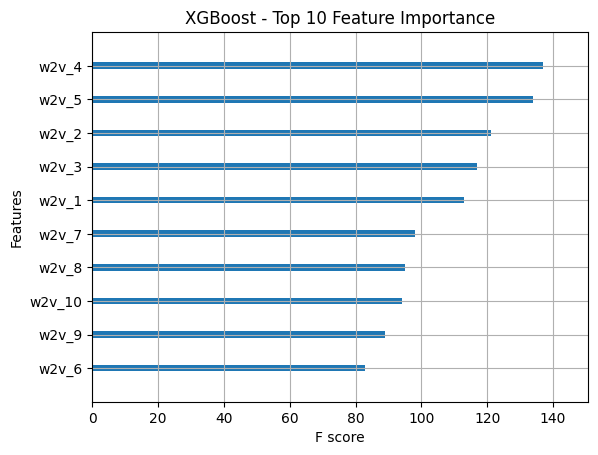

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost')
plt.show()

# ROC Curve
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure()
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_xgb))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - XGBoost')
plt.legend(loc='lower right')
plt.show()

# Feature Importance Plot
from xgboost import plot_importance

plot_importance(xgb_model, max_num_features=10, importance_type='weight', show_values=False)
plt.title('XGBoost - Top 10 Feature Importance')
plt.show()

In [ ]:
#!pip install gtts

In [ ]:
import requests
from bs4 import BeautifulSoup
from gtts import gTTS
from IPython.display import Audio

def analyze_webpage(url):
    # Send a GET request to the URL
    response = requests.get(url)

    # Check if the request was successful
    if response.status_code == 200:
        # Parse the HTML content of the webpage
        soup = BeautifulSoup(response.content, 'html.parser')

        # Example analysis: Check for hidden elements
        hidden_elements = soup.find_all(style=lambda value: 'hidden' in str(value).lower())
        a = "Hidden elements found on the webpage." if hidden_elements else "No hidden elements found."

        # Example analysis: Check for buttons with misleading labels
        buttons = soup.find_all('button')
        for button in buttons:
            if "submit" in button.get('type', '') and "confirm" in button.text.lower():
                a += f"\nButton with potentially misleading label: {button.text.strip()}"

        # Add more analysis here based on specific dark patterns you want to identify

        return a
    else:
        return f"Failed to fetch webpage. Status code: {response.status_code}"

# Call the analyze_webpage function with the URL to analyze
a = analyze_webpage("https://www.desidime.com/")
print(a)  # Print the analysis result

def text_to_speech(text):
    tts = gTTS(text=text, lang='en')
    tts.save("output.mp3")
    return Audio("output.mp3", autoplay=True)

# Example usage of text_to_speech function
text_to_speech(a)

# Example usage
#text = "Hello, how are you?"




In [ ]:
text_to_speech(res)